Epoch 0, Loss: 0.3566479380409135
Epoch 1000, Loss: 0.2500361117010306
Epoch 2000, Loss: 0.2497755501632081
Epoch 3000, Loss: 0.24919608157832435
Epoch 4000, Loss: 0.24695026189246713
Epoch 5000, Loss: 0.23473519369125667
Epoch 6000, Loss: 0.20430677738902892
Epoch 7000, Loss: 0.18653782651326722
Epoch 8000, Loss: 0.17896631231501497
Epoch 9000, Loss: 0.17517423777520247


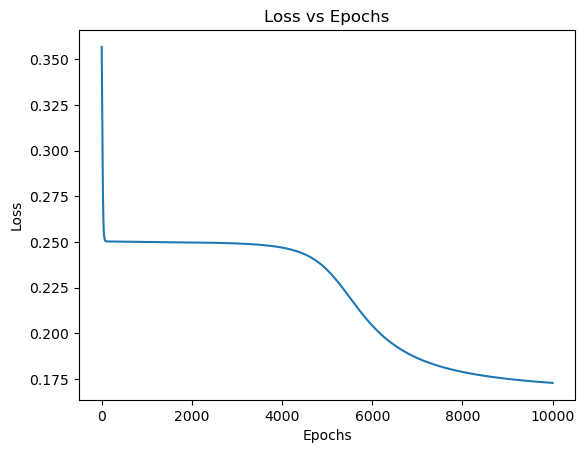

Final Output after Training:
[[0.34889951]
 [0.91927338]
 [0.33107136]
 [0.34078016]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (inputs and outputs)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # XOR input
y = np.array([[0], [1], [1], [0]])  # XOR output

# Hyperparameters
learning_rate = 0.1
epochs = 10000  # Number of iterations

# Initialize weights and biases
input_size = 2
hidden_size = 2
output_size = 1

# Random weights and biases
W_hidden = np.random.randn(input_size, hidden_size)
b_hidden = np.random.randn(hidden_size)
W_output = np.random.randn(hidden_size, output_size)
b_output = np.random.randn(output_size)

# Activation function (Sigmoid) and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# List to store loss values for plotting
losses = []

# Training loop
for epoch in range(epochs):
    # Forward propagation
    hidden_layer_input = np.dot(X, W_hidden) + b_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, W_output) + b_output
    output_layer_output = sigmoid(output_layer_input)
    
    # Compute the loss (Mean Squared Error)
    loss = np.mean((y - output_layer_output) ** 2)
    losses.append(loss)  # Append loss to list for plotting
    
    # Backpropagation
    output_layer_error = y - output_layer_output
    output_layer_delta = output_layer_error * sigmoid_derivative(output_layer_output)

    hidden_layer_error = output_layer_delta.dot(W_output.T)
    hidden_layer_delta = hidden_layer_error * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    W_output += hidden_layer_output.T.dot(output_layer_delta) * learning_rate
    b_output += np.sum(output_layer_delta, axis=0) * learning_rate
    W_hidden += X.T.dot(hidden_layer_delta) * learning_rate
    b_hidden += np.sum(hidden_layer_delta, axis=0) * learning_rate

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Plotting the loss curve
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

# Final prediction
print("Final Output after Training:")
print(output_layer_output)
